<a href="https://colab.research.google.com/github/Falestio/6701213063-FalestioHanifAlHakim-assessment1/blob/master/Falestio_Hanif_Al_Hakim_Assessment_1_Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Petunjuk
![picture](https://storage.googleapis.com/kaggle-datasets-images/3786485/6552418/10e8bf7549a7662bfeaee9a112cca9fb/dataset-cover.png?t=2023-09-27-09-29-19)

**Tentang Dataset**

**Konteks**

Dataset Prediksi Risiko Serangan Jantung berfungsi sebagai sumber daya berharga untuk mempelajari dinamika rumit kesehatan jantung dan prediktornya. Serangan jantung, atau infark miokard, terus menjadi masalah kesehatan global yang signifikan, sehingga memerlukan pemahaman lebih dalam mengenai faktor-faktor pemicunya dan potensi faktor mitigasinya. Dataset ini merangkum beragam atribut termasuk usia, kadar kolesterol, tekanan darah, kebiasaan merokok, pola olahraga, preferensi makanan, dan banyak lagi, yang bertujuan untuk menjelaskan interaksi kompleks dari variabel-variabel ini dalam menentukan kemungkinan serangan jantung. Dengan menggunakan analisis prediktif dan pembelajaran mesin pada Dataset ini, para peneliti dan profesional kesehatan dapat bekerja menuju strategi proaktif untuk pencegahan dan pengelolaan penyakit jantung. Dataset ini merupakan bukti upaya kolektif untuk meningkatkan pemahaman kita tentang kesehatan kardiovaskular dan membuka jalan menuju masa depan yang lebih sehat.

**Konten**

Dataset ini menyediakan serangkaian fitur komprehensif yang relevan dengan kesehatan jantung dan pilihan gaya hidup, yang mencakup detail spesifik pasien seperti usia, jenis kelamin, kadar kolesterol, tekanan darah, detak jantung, dan indikator seperti diabetes, riwayat keluarga, kebiasaan merokok, obesitas, dan konsumsi alkohol. Selain itu, faktor gaya hidup seperti jam olahraga, kebiasaan makan, tingkat stres, dan jam duduk juga disertakan. Aspek medis yang meliputi masalah jantung sebelumnya, penggunaan obat-obatan, dan kadar trigliserida juga dipertimbangkan. Aspek sosial ekonomi seperti pendapatan dan atribut geografis seperti negara, benua, dan belahan bumi dimasukkan. Dataset tersebut, yang terdiri dari 8.763 catatan pasien di seluruh dunia, menghasilkan fitur klasifikasi biner penting yang menunjukkan ada atau tidaknya risiko serangan jantung, sehingga menyediakan sumber daya komprehensif untuk analisis prediktif dan penelitian di bidang kesehatan kardiovaskular.

**Struktur Dataset**

![picture](https://i.imgur.com/5cTusqA.png)

Dataset asli dapat didownload pada link berikut https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset



**TUGAS ANDA**

Pada assessment ini, tugas anda adalah memprediksi resiko serangan jantung yang ada pada kolom **"Heart Attack Risk"** dengan menggunakan feature-feature yang ada pada dataset. Adapun persoalan yang wajib diselesaikan adalah:
1. Pemilihan feature-feature mana saja yang paling berpengaruh terhadap risiko serangan jantung;
2. Penggunaan algoritma machine learning dan HPO dengan akurasi tertinggi untuk memprediksi resiko serangan jantung


**Apa saja yang harus dikumpulkan pada assessment ini?**

1. Notebook yang sudah diisi dan dieksekusi sesuai template yang disediakan (50%)
2. Video penjelasan program yang dibuat secara detail dengan menampilkan wajah presenter maksimal 10 menit (50%)



#Load library dan data

In [ ]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from numpy import unique
from pandas import read_csv
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/dataset_ilmu_data
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1BnT1PUi2IeuGU9TUqLEotfnY-aiw39Ee/dataset_ilmu_data
 assessment		 'Encoding Data.csv'	        iris
'breast-cancer (1).csv'   e-nose		       'iris (1)'
 breast-cancer.csv	 'e-nose fish'		        iris.pdf
 buah			 'e-nose halal'		       'mobile price classification'
'Car Evaluation'	  e-nose_halal_model.sav        model_plot.png
 classifier.png		 'e-nose meat'		        my_dir
 clustering		  e-nose.pdf		        PCA_seafood.html
 contoh_data.xlsx	  e-nose.png		        PCA_tea.html
 creditcardfraud	  e-nose.png.pdf	        regression.png
 data.csv		 'e-nose rice'		        rekap_hasil.xlsx
 data_noise_free1.csv	 'e-nose seafood'	        Save_Model_Enose_Meat_Regresi.sav
 data_noise_free2.csv	  hasil_klasifikasi_dedy.xlsx   scaler_meat.sav
 data_noise_free3.csv	  hasil_regresi_dedy.xlsx       scaler.sav
 data_noise_free4.csv	  hasil_regresi.xlsx	       'Spaceship Titanic'
 data_noise_free5.csv	  heart_attack		        submission.

In [ ]:
#load data google drive
df = pd.read_csv('/content/drive/My Drive/dataset_ilmu_data/heart_attack/heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


#1. Feature selection

In [ ]:
#print kolom
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
print(df.head(10))

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   
5    ZOO7941   54  Female          297         172/86          48         1   
6    WYV0966   90    Male          358         102/73          84         0   
7    XXM0972   84    Male          220         131/68         107         0   
8    XCQ5937   20    Male          145        144/105          68         1   
9    FTJ5456   43  Female          248         160/70          55         0   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...             

In [ ]:
# Drop patient id
df = df.drop(columns=['Patient ID'])

# Separate label and features using loc
label_diskrit = df['Heart Attack Risk']
features = df.loc[:, 'Age':'Hemisphere']

In [ ]:
!pip install skfeature-chappers

In [ ]:
import pandas as pd
from sklearn import preprocessing
from skfeature.function.statistical_based import chi_square

# Encoding kolom yang masih categorical
categorical_columns = ['Sex', 'Country', 'Continent', 'Hemisphere', 'Blood Pressure', 'Diet']
for col in categorical_columns:
    encoder = preprocessing.LabelEncoder()
    features[col] = encoder.fit_transform(features[col])

# Encode
encoder = preprocessing.LabelEncoder()
transformed_label_diskrit = encoder.fit_transform(label_diskrit)

# Scale menggunakan MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Apply chi-square
ranked_index = chi_square.chi_square(scaled_features, transformed_label_diskrit, mode='index')

# Print kolom yang sudah di ranking
for idx in ranked_index:
    print(features.columns[idx])


Hemisphere
Diabetes
Obesity
Alcohol Consumption
Sleep Hours Per Day
Cholesterol
Exercise Hours Per Week
Triglycerides
Income
Age
Diet
Physical Activity Days Per Week
Blood Pressure
Sedentary Hours Per Day
Continent
Stress Level
Heart Rate
Sex
Medication Use
Country
Smoking
Family History
Previous Heart Problems
BMI


#2. Hyperparameter Optimization dan Training

jumlah_fitur_terbaik= 1
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.357 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.466 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.451 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.458 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.414 total time=   0.1s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.357 total time=   0.1s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.357 total time=   0.1s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.488 total time=   0.0s
[CV 10/

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 2
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 1.]
 [0. 1.]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.559 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.471 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.527 total time=   0.1s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.478 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.426 total time=   0.1s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.533 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 3
[[1. 0. 0.]
 [0. 1. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 0.]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.511 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.477 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.502 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.577 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.569 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.581 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.439 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 4
[[1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.634 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.537 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.539 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.531 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.530 total time=   0.1s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.566 total time=   0.1s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.540 total time=   0.1s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.517 total time=   0.1s
[CV 9/10] END metric=euclidean, n_neighbors=1, we

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 5
[[1.         0.         0.         0.         0.33333333]
 [0.         1.         1.         1.         0.5       ]
 [0.         1.         0.         0.         0.        ]
 ...
 [1.         0.         1.         1.         0.        ]
 [1.         1.         0.         0.         0.66666667]
 [0.         1.         0.         1.         0.        ]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.557 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.523 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.541 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.529 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.520 total time=   0.1s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.542 to

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 6
[[1.         0.         0.         0.         0.33333333 0.31428571]
 [0.         1.         1.         1.         0.5        0.96071429]
 [0.         1.         0.         0.         0.         0.72857143]
 ...
 [1.         0.         1.         1.         0.         0.46428571]
 [1.         1.         0.         0.         0.66666667 0.20714286]
 [0.         1.         0.         1.         0.         0.84285714]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.518 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.526 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.555 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.508 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.530 total time=   0.1s
[CV 6/10] END

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 7
[[1.         0.         0.         ... 0.33333333 0.31428571 0.20832621]
 [0.         1.         1.         ... 0.5        0.96071429 0.09055687]
 [0.         1.         0.         ... 0.         0.72857143 0.10381491]
 ...
 [1.         0.         1.         ... 0.         0.46428571 0.15732915]
 [1.         1.         0.         ... 0.66666667 0.20714286 0.18941073]
 [0.         1.         0.         ... 0.         0.84285714 0.90413405]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.549 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.541 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.546 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.549 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.548 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 8
[[1.         0.         0.         ... 0.31428571 0.20832621 0.33246753]
 [0.         1.         1.         ... 0.96071429 0.09055687 0.26623377]
 [0.         1.         0.         ... 0.72857143 0.10381491 0.72337662]
 ...
 [1.         0.         1.         ... 0.46428571 0.15732915 0.64545455]
 [1.         1.         0.         ... 0.20714286 0.18941073 0.10909091]
 [0.         1.         0.         ... 0.84285714 0.90413405 0.19480519]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.547 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.557 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.537 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.573 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.576 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 9
[[1.         0.         0.         ... 0.20832621 0.33246753 0.8622683 ]
 [0.         1.         1.         ... 0.09055687 0.26623377 0.94931616]
 [0.         1.         0.         ... 0.10381491 0.72337662 0.76893945]
 ...
 [1.         0.         1.         ... 0.15732915 0.64545455 0.06050905]
 [1.         1.         0.         ... 0.18941073 0.10909091 0.6784081 ]
 [0.         1.         0.         ... 0.90413405 0.19480519 0.81201321]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.568 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.581 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.546 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.557 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.501 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 10
[[1.         0.         0.         ... 0.33246753 0.8622683  0.68055556]
 [0.         1.         1.         ... 0.26623377 0.94931616 0.04166667]
 [0.         1.         0.         ... 0.72337662 0.76893945 0.04166667]
 ...
 [1.         0.         1.         ... 0.64545455 0.06050905 0.40277778]
 [1.         1.         0.         ... 0.10909091 0.6784081  0.25      ]
 [0.         1.         0.         ... 0.19480519 0.81201321 0.09722222]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.560 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.560 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.528 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.552 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.524 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 11
[[1.         0.         0.         ... 0.8622683  0.68055556 0.        ]
 [0.         1.         1.         ... 0.94931616 0.04166667 1.        ]
 [0.         1.         0.         ... 0.76893945 0.04166667 0.5       ]
 ...
 [1.         0.         1.         ... 0.06050905 0.40277778 0.        ]
 [1.         1.         0.         ... 0.6784081  0.25       1.        ]
 [0.         1.         0.         ... 0.81201321 0.09722222 0.5       ]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.559 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.524 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.518 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.544 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.520 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 12
[[1.         0.         0.         ... 0.68055556 0.         0.        ]
 [0.         1.         1.         ... 0.04166667 1.         0.14285714]
 [0.         1.         0.         ... 0.04166667 0.5        0.57142857]
 ...
 [1.         0.         1.         ... 0.40277778 0.         0.57142857]
 [1.         1.         0.         ... 0.25       1.         0.28571429]
 [0.         1.         0.         ... 0.09722222 0.5        1.        ]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.554 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.549 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.505 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.547 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.532 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 13
[[1.         0.         0.         ... 0.         0.         0.64128769]
 [0.         1.         1.         ... 1.         0.14285714 0.71921308]
 [0.         1.         0.         ... 0.5        0.57142857 0.82370976]
 ...
 [1.         0.         1.         ... 0.         0.57142857 0.6704139 ]
 [1.         1.         0.         ... 1.         0.28571429 0.21410322]
 [0.         1.         0.         ... 0.5        1.         0.41824221]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.528 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.536 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.518 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.555 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.566 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 14
[[1.         0.         0.         ... 0.         0.64128769 0.55123442]
 [0.         1.         1.         ... 0.14285714 0.71921308 0.4135835 ]
 [0.         1.         0.         ... 0.57142857 0.82370976 0.78864169]
 ...
 [1.         0.         1.         ... 0.57142857 0.6704139  0.19786136]
 [1.         1.         0.         ... 0.28571429 0.21410322 0.00232046]
 [0.         1.         0.         ... 1.         0.41824221 0.75045287]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.541 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.539 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.541 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.565 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.517 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 15
[[1.         0.         0.         ... 0.64128769 0.55123442 1.        ]
 [0.         1.         1.         ... 0.71921308 0.4135835  0.8       ]
 [0.         1.         0.         ... 0.82370976 0.78864169 0.6       ]
 ...
 [1.         0.         1.         ... 0.6704139  0.19786136 1.        ]
 [1.         1.         0.         ... 0.21410322 0.00232046 1.        ]
 [0.         1.         0.         ... 0.41824221 0.75045287 0.6       ]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.521 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.526 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.516 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.564 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.517 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sk

jumlah_fitur_terbaik= 16
[[1.         0.         0.         ... 0.55123442 1.         0.88888889]
 [0.         1.         1.         ... 0.4135835  0.8        0.        ]
 [0.         1.         0.         ... 0.78864169 0.6        0.88888889]
 ...
 [1.         0.         1.         ... 0.19786136 1.         0.44444444]
 [1.         1.         0.         ... 0.00232046 1.         0.44444444]
 [0.         1.         0.         ... 0.75045287 0.6        0.77777778]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.523 total time=   0.3s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.528 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.536 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.545 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 6/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

jumlah_fitur_terbaik= 17
[[1.         0.         0.         ... 1.         0.88888889 0.45714286]
 [0.         1.         1.         ... 0.8        0.         0.82857143]
 [0.         1.         0.         ... 0.6        0.88888889 0.45714286]
 ...
 [1.         0.         1.         ... 1.         0.44444444 0.92857143]
 [1.         1.         0.         ... 1.         0.44444444 0.28571429]
 [0.         1.         0.         ... 0.6        0.77777778 0.5       ]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.516 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.510 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.542 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.537 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.517 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 4/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 8/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 9/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_n

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib

[CV 6/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 5/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib

[CV 4/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 8/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 7/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
{'metric': 'chebyshev', 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(metric='chebyshev', n_neighbors=9, weights='distance')
jumlah_fitur_terbaik= 21
[[1.         0.         0.         ... 0.         0.         1.        ]
 [0.         1.         1.         ... 0.         0.15789474 1.        ]
 [0.         1.         0.         ... 1.         0.31578947 0.        ]
 ...
 [1.         0.         1.         ... 0.         0.10526316 1.        ]
 [1.         1.         0.         ... 1.         0.10526316 1.        ]
 [0.         1.         0.         ... 0.         0.89473684 0.        ]]
F

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 1/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalano

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 9/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 4/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib

jumlah_fitur_terbaik= 23
[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.531 total time=   0.1s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.520 total time=   0.1s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.521 total time=   0.1s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.531 total time=   0.1s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.542 total time=   0.1s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.551 total time=   0.1s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.532 total time=   0.1s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.540 total t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 6/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=1, weights=distance;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib

[CV 4/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=9, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

[CV 1/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_nei

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib

[CV 9/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 10/10] END metric=mahalanobis, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 1/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 2/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 3/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 4/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 5/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 6/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 7/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 8/10] END metric=mahalanobis, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 9/10] END metric=mahalanobis, n_n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1678
           1       0.00      0.00      0.00       951

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



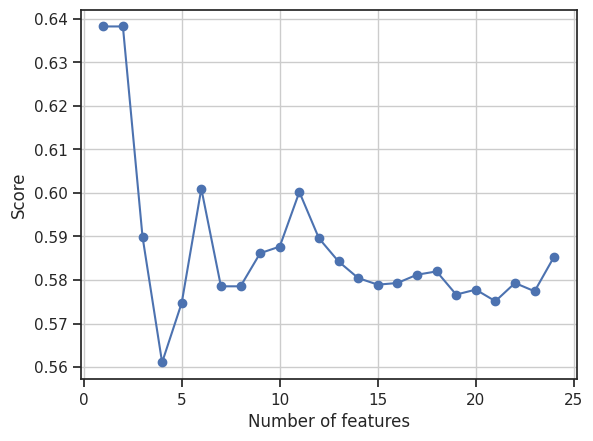

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

jumlah_fitur = range(1, scaled_features.shape[1]+1)

scores = []
score = 0
best_score = 0
best_feature_number = 0

# Use features based on their ranking from chi-square for training
for jumlah_fitur_terbaik in jumlah_fitur:
    print('jumlah_fitur_terbaik=', jumlah_fitur_terbaik)

    # Use the ranked features
    selected_features = scaled_features[:, ranked_index[:jumlah_fitur_terbaik]]
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split(selected_features, transformed_label_diskrit, test_size=0.3, random_state=0)

    # Already scaled earlier
    classifier = KNeighborsClassifier()

    param_grid = [
        {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'mahalanobis'], 'weights': ['uniform', 'distance']}
    ]

    metric = make_scorer(recall_score, average='weighted')

    model = GridSearchCV(classifier, param_grid, scoring=metric, cv=10, refit=True, verbose=3)
    model.fit(X_train, y_train)

    print(model.best_params_)
    print(model.best_estimator_)

    score = model.score(X_test, y_test)
    scores.append(score)

    if best_score < score:
        best_score = score
        best_model = model
        best_feature_number = jumlah_fitur_terbaik
        best_parameter = model.best_params_
        best_X_test = X_test

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.plot(jumlah_fitur, scores, marker="o", label="Score")
plt.grid()

print(scores)
print('Jumlah fitur terbaik adalah: ', best_feature_number)
print('Score terbaik adalah: ', best_score)
print('Parameter terbaik adalah: ', best_parameter)

final_predictions = best_model.predict(best_X_test)

print(classification_report(y_test, final_predictions))


Output streaming akan dipotong hingga 5000 baris terakhir.
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.609 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.617 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.594 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.599 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.626 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.633 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.600 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


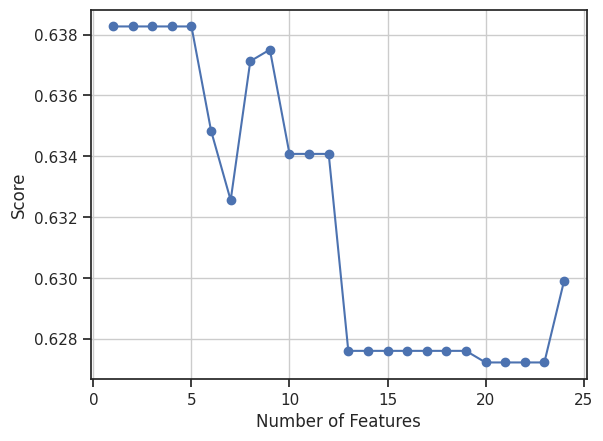

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

jumlah_fitur = range(1, scaled_features.shape[1] + 1)

scores = []
best_score = 0
best_feature_number = 0

# Optimize hyperparameters for each feature combination
for jumlah_fitur_terbaik in jumlah_fitur:
    print('jumlah_fitur_terbaik =', jumlah_fitur_terbaik)
    selected_features = scaled_features[:, ranked_index[:jumlah_fitur_terbaik]]
    print(selected_features)

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(selected_features, transformed_label_diskrit, test_size=0.3, random_state=0)

    # Classification
    classifier = DecisionTreeClassifier()

    # Hyperparameter optimization
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10]
    }

    # Use recall as the priority metric
    metric = make_scorer(recall_score, average='weighted')

    model = GridSearchCV(classifier, param_grid, scoring=metric, cv=10, refit=True, verbose=3)
    model.fit(X_train, y_train)

    # Print best hyperparameters
    print(model.best_params_)
    print(model.best_estimator_)

    score = model.score(X_test, y_test)
    scores.append(score)

    # Determine the best model based on the best score
    if best_score < score:
        best_score = score
        best_model = model
        best_feature_number = jumlah_fitur_terbaik
        best_parameter = model.best_params_
        best_X_test = X_test

# Plot
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(jumlah_fitur, scores, marker="o", label="Score")
plt.grid()

print(scores)
print('Jumlah fitur terbaik adalah:', best_feature_number)
print('Score terbaik adalah:', best_score)
print('Parameter terbaik adalah:', best_parameter)

final_predictions = best_model.predict(best_X_test)
print(classification_report(y_test, final_predictions))


#3. Penjelasan hasil prediksi dan feature-feature yang terpilih

In [ ]:
#Tulis penjelasannya di sini